In [ ]:
!pip install zipline-tej

### **因為版本相容問題，我們必須將 pandas 的版本改成1.5.3版，並且無須理會安裝完的 Error 。**
**（因應近期 Google Colab 改版，需要新增 dask 降版指令）**

In [ ]:
!pip install  pandas==1.5.3
!pip install dask==2.30.0   # dask 降版
!pip install distributed==2.30.0   # distributed 降版

### **到這個步驟已經可以正常使用了，我們會用一個簡單的小例子來展示結果，先載入常用套件，並輸入 TEJAPI_KEY 。**

In [ ]:
import os
os.environ['TEJAPI_BASE'] = 'https://api.tej.com.tw'
os.environ['TEJAPI_KEY'] = 'Your_Key'

import datetime

import tejapi
import pandas as pd
import numpy as np

In [ ]:
from zipline.sources.TEJ_Api_Data import get_universe

### **選出有興趣的公司，這邊先篩選為半導體或電腦產業別的上市公司**

In [ ]:
pool = get_universe(start = '2023-07-02',
                    end = '2024-07-02',
                    mkt_bd_e = 'TSE',  # 已上市之股票
                    stktp_e = 'Common Stock',  # 普通股
                    sub_ind_e=['M2324 Semiconductor', 'M2325 Computer and Peripheral Equipment'])
pool

Currently used TEJ API key call quota 5/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 41888/9223372036854775807 (0.0%)


['2301',
 '2302',
 '2303',
 '2305',
 '2324',
 '2329',
 '2330',
 '2331',
 '2337',
 '2338',
 '2340',
 '2342',
 '2344',
 '2351',
 '2352',
 '2353',
 '2356',
 '2357',
 '2362',
 '2363',
 '2364',
 '2365',
 '2369',
 '2376',
 '2377',
 '2379',
 '2380',
 '2382',
 '2387',
 '2388',
 '2395',
 '2397',
 '2399',
 '2401',
 '2405',
 '2408',
 '2417',
 '2425',
 '2434',
 '2436',
 '2441',
 '2449',
 '2451',
 '2454',
 '2458',
 '2465',
 '2481',
 '2495',
 '3002',
 '3005',
 '3006',
 '3013',
 '3014',
 '3016',
 '3017',
 '3022',
 '3034',
 '3035',
 '3041',
 '3046',
 '3057',
 '3060',
 '3094',
 '3189',
 '3231',
 '3257',
 '3413',
 '3416',
 '3443',
 '3450',
 '3494',
 '3515',
 '3530',
 '3532',
 '3545',
 '3583',
 '3588',
 '3592',
 '3652',
 '3686',
 '3701',
 '3706',
 '3711',
 '3712',
 '4916',
 '4919',
 '4938',
 '4952',
 '4961',
 '4967',
 '4968',
 '5222',
 '5258',
 '5269',
 '5285',
 '5471',
 '6117',
 '6128',
 '6166',
 '6202',
 '6206',
 '6230',
 '6235',
 '6239',
 '6243',
 '6257',
 '6271',
 '6277',
 '6414',
 '6515',
 '6526',
 

In [ ]:
import TejToolAPI

start_time = pd.Timestamp('2023-07-02')
end_time = pd.Timestamp('2024-07-02')

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,
                                   fin_type = 'Q', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['主產業別_中文', '常續ROE', '營業毛利率', '營運產生現金流量', '投資產生現金流量', '負債比率', 'per_tej', '營業總收入'],
                                   transfer_to_chinese = True)

data  = data.drop_duplicates(subset=['股票代碼'], keep='last').reset_index(drop=True)

data


Currently used TEJ API key call quota 25/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 246947/9223372036854775807 (0.0%)


,股票代碼,日期,主產業別_中文,本益比_TEJ,營業毛利率_Q,投資產生現金流量_Q,負債比率_Q,營業總收入_Q,常續ROE_Q,營運產生現金流量_Q
0,2301,2024-07-02,M2300 電子工業,20.8186,20.32,-8539994.0,54.57,28775904.0,1.23,1595764.0
1,2302,2024-07-02,M2300 電子工業,35.6755,37.43,2849.0,25.93,147257.0,0.73,14978.0
2,2303,2024-07-02,M2300 電子工業,11.8023,30.93,-29914635.0,33.30,54632099.0,2.94,20819871.0
3,2305,2024-07-02,M2300 電子工業,243.9021,32.48,126270.0,21.83,173649.0,-0.09,10878.0
4,2324,2024-07-02,M2300 電子工業,17.8337,4.91,-2205331.0,70.01,199571114.0,1.69,8250149.0
...,...,...,...,...,...,...,...,...,...,...
131,8163,2024-07-02,M2300 電子工業,212.9516,19.12,429411.0,55.27,5111173.0,1.23,594704.0
132,8210,2024-07-02,M2300 電子工業,24.9009,24.83,-305706.0,54.81,2773241.0,6.39,879194.0
133,8261,2024-07-02,M2300 電子工業,29.1586,18.19,-421234.0,8.40,589746.0,1.58,219039.0
134,8271,2024-07-02,M2300 電子工業,14.7692,20.03,18409.0,25.87,1946702.0,2.64,-724072.0


### **篩選營收最高的五間公司，紀錄其股票代碼。**

In [ ]:
data = data.nlargest(5, '營業總收入_Q')

data

,股票代碼,日期,主產業別_中文,本益比_TEJ,營業毛利率_Q,投資產生現金流量_Q,負債比率_Q,營業總收入_Q,常續ROE_Q,營運產生現金流量_Q
6,2330,2024-07-02,M2300 電子工業,29.1046,53.07,-159806991.0,36.67,592644201.0,6.40,436311108.0
27,2382,2024-07-02,M2300 電子工業,26.0091,8.48,22640275.0,76.20,258939378.0,6.50,23733615.0
86,4938,2024-07-02,M2300 電子工業,18.0987,4.23,-2946059.0,57.42,250399656.0,1.54,20958867.0
64,3231,2024-07-02,M2300 電子工業,21.5123,7.20,-2693302.0,69.48,239325146.0,4.39,3127081.0
4,2324,2024-07-02,M2300 電子工業,17.8337,4.91,-2205331.0,70.01,199571114.0,1.69,8250149.0


In [ ]:
tickers = data['股票代碼'].unique()

tickers

array(['2330', '2382', '4938', '3231', '2324'], dtype=object)

### **將資料載入本地電腦，方便運行**

In [ ]:
start = '2023-01-01'
end = '2024-07-02'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

[2024-07-04 01:21:13.785539] INFO: zipline.data.bundles.core: Ingesting tquant.
Merging daily equity files:  [####################################]   
Currently used TEJ API key call quota 34/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 337912/9223372036854775807 (0.0%)
[2024-07-04 01:21:28.543091] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [ ]:
from zipline.data import bundles

bundle_data = bundles.load('tquant')

### **採用與『巴菲特選股策略回測』後半部分相同的分析方法**

In [ ]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
    set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
    set_benchmark(symbol('IR0001'))
    set_liquidity_risk_management_rule(['全額交割股票(Full-Cash Delivery Securities)', '漲停股票(Limit Up)', '跌停股票(Limit Down)', '開盤即鎖死(Limited Whole Day)'])

In [ ]:
def handle_data(context, data):

    #回測第一天買進
    if context.day == 0:
        for ticker in context.tickers:
            order_percent(symbol(ticker), 1 / len(tickers))

    context.day += 1

In [ ]:
import matplotlib.pyplot as plt

capital_base = 1e6  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

### **可以看出，策略有成功運行**

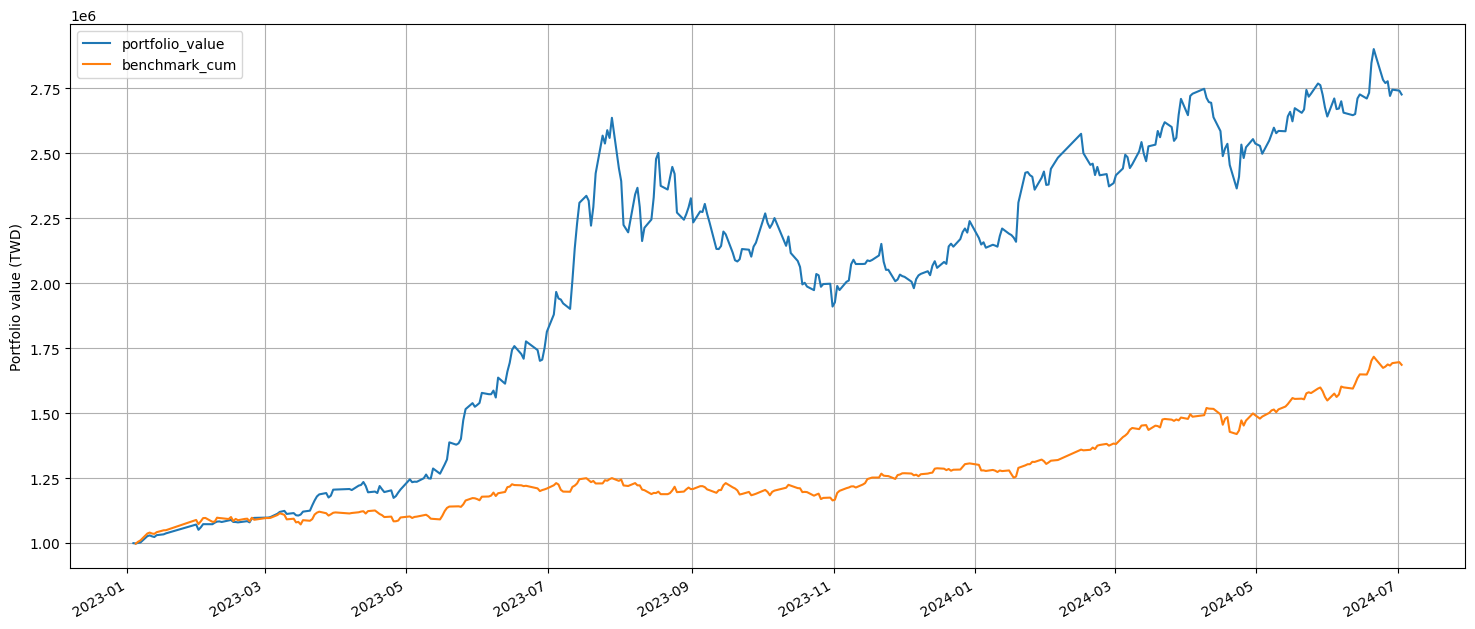

,period_open,period_close,gross_leverage,positions,net_leverage,short_exposure,starting_cash,treasury_return,ending_cash,portfolio_value,...,max_leverage,treasury_period_return,trading_days,period_label,algorithm_period_return,algo_volatility,benchmark_period_return,excess_return,benchmark_volatility,benchmark_cum
2023-01-03 13:30:00+08:00,2023-01-03 09:01:00+08:00,2023-01-03 13:30:00+08:00,0.000000,[],0.000000,0.0,1000000.000000,0.0,1000000.000000,1.000000e+06,...,0.000000,0.0,1,2023-01,0.000000,NaN,0.000000,0.000000,NaN,NaN
2023-01-04 13:30:00+08:00,2023-01-04 09:01:00+08:00,2023-01-04 13:30:00+08:00,0.998963,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.998963,0.0,1000000.000000,0.0,1035.035448,9.985759e+05,...,0.998963,0.0,2,2023-01,-0.001424,0.015985,-0.001741,0.000317,NaN,9.982590e+05
2023-01-05 13:30:00+08:00,2023-01-05 09:01:00+08:00,2023-01-05 13:30:00+08:00,0.998966,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.998966,0.0,1035.035448,0.0,1035.035448,1.001245e+06,...,0.998966,0.0,3,2023-01,0.001245,0.033017,0.005424,-0.004180,0.100115,1.005424e+06
2023-01-06 13:30:00+08:00,2023-01-06 09:01:00+08:00,2023-01-06 13:30:00+08:00,0.998968,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.998968,0.0,1035.035448,0.0,1035.035448,1.002598e+06,...,0.998968,0.0,4,2023-01,0.002598,0.027961,0.010506,-0.007909,0.073959,1.010506e+06
2023-01-09 13:30:00+08:00,2023-01-09 09:01:00+08:00,2023-01-09 13:30:00+08:00,0.998992,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.998992,0.0,1035.035448,0.0,1035.035448,1.026972e+06,...,0.998992,0.0,5,2023-01,0.026972,0.169715,0.037143,-0.010171,0.191248,1.037143e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 13:30:00+08:00,2024-06-26 09:01:00+08:00,2024-06-26 13:30:00+08:00,0.963874,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.963874,0.0,100324.969410,0.0,100324.969410,2.777073e+06,...,0.999162,0.0,354,2024-06,1.777073,0.328169,0.687501,1.089572,0.138582,1.687501e+06
2024-06-27 13:30:00+08:00,2024-06-27 09:01:00+08:00,2024-06-27 13:30:00+08:00,0.963122,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.963122,0.0,100324.969410,0.0,100324.969410,2.720485e+06,...,0.999162,0.0,355,2024-06,1.720485,0.328302,0.683184,1.037301,0.138428,1.683184e+06
2024-06-28 13:30:00+08:00,2024-06-28 09:01:00+08:00,2024-06-28 13:30:00+08:00,0.963446,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.963446,0.0,100324.969410,0.0,100324.969410,2.744534e+06,...,0.999162,0.0,356,2024-06,1.744534,0.327876,0.692644,1.051890,0.138276,1.692644e+06
2024-07-01 13:30:00+08:00,2024-07-01 09:01:00+08:00,2024-07-01 13:30:00+08:00,0.963398,"[{'sid': Equity(1 [2330]), 'amount': 441, 'cos...",0.963398,0.0,100324.969410,0.0,100324.969410,2.740965e+06,...,0.999162,0.0,357,2024-07,1.740965,0.327435,0.696368,1.044597,0.138082,1.696368e+06


In [ ]:
from zipline import run_algorithm

start_date = pd.Timestamp('20230101', tz = 'utc')
end_date = pd.Timestamp('20240702', tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results

### **在繪製夏普比率圖時使用 Pyfolio 的套件，雖然圖有成功跑出來，但會出現無法找到對應字型的警告**

In [ ]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio as pf

# 從 results 資料表中取出 returns, positions & transactions
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

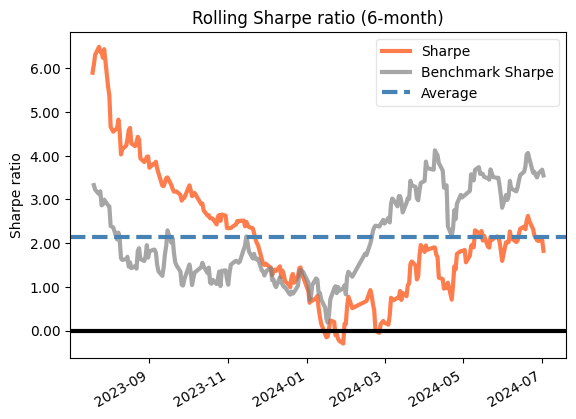

In [ ]:
# 繪製夏普比率圖
from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets)

### **所以在這邊我們手動安裝字型，再試一次之後會發現沒有警告了**

In [ ]:
import matplotlib
!wget -O MicrosoftJhengHei.ttf https://drive.google.com/uc?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_&export=download
!wget -O ArialUnicodeMS.ttf https://drive.google.com/uc?id=1Y4O8Flv7lfrzHqOE8dkFTSctyYOpAJ0N&export=download
matplotlib.font_manager.fontManager.addfont('MicrosoftJhengHei.ttf')
matplotlib.rc('font', family='sans-serif')

matplotlib.font_manager.fontManager.addfont('ArialUnicodeMS.ttf')
matplotlib.rc('font', family='sans-serif')

--2024-07-04 01:43:42--  https://drive.google.com/uc?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_
Resolving drive.google.com (drive.google.com)... 173.194.210.102, 173.194.210.113, 173.194.210.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_ [following]
--2024-07-04 01:43:42--  https://drive.usercontent.google.com/download?id=1nMlvxPOPUGkHxYD5kuP8Ur37EmKlZAW_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21663376 (21M) [application/octet-stream]
Saving to: ‘MicrosoftJhengHei.ttf’

MicrosoftJhengHei.t 100%[===================>]  20.66M  58.5MB/s    in 0.4s    

2024-07-04 01:43:45 

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

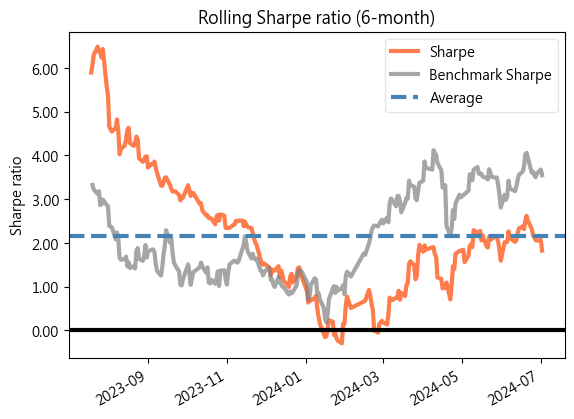

In [ ]:
# 再繪製一次夏普比率圖，看是否跳出warning
plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets)